# Pandas 3 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

The data `time_usage.txt` contains data on how Americans spend their time from 2007-2017.
Read in the data as a `DataFrame` object and use `groupby()` to filter through the \li{DataFrame} and answer the following questions:

1. How the mean amount of time spent on all activities change over the 2007 to 2017?

2. On average (using the mean), did Americans spend more time doing exercise or watching TV over the past ten years? What was the difference?

(Hint: The column `Estimate` gives the amount of hours spent on an activity. The activity `Watching TV` contains data on Americans watching TV and the activity `Participating in Sports Exercise and Rec Activity` contains data on Americans exercising.)


In [23]:
time_usage = pd.read_csv("time_usage.txt")
time_usage = time_usage.dropna()
time_usage.Year = time_usage.Year.astype(int)
time_usage = time_usage.drop([i for i in range(11)])
time_usage

,Activity,Year,Period,Estimate,Standard Error
11,Personal Care,2007,Annual,9.33,0.026
12,Personal Care,2008,Annual,9.39,0.025
13,Personal Care,2009,Annual,9.45,0.023
14,Personal Care,2010,Annual,9.47,0.027
15,Personal Care,2011,Annual,9.49,0.026
16,Personal Care,2012,Annual,9.49,0.026
17,Personal Care,2013,Annual,9.54,0.027
18,Personal Care,2014,Annual,9.58,0.027
19,Personal Care,2015,Annual,9.64,0.028
20,Personal Care,2016,Annual,9.58,0.028


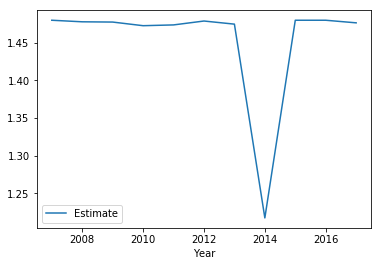

In [27]:
by_year = time_usage.groupby("Year")
by_year.mean().plot(y="Estimate")
plt.show()

In [42]:
list(by_activity.groups)

['Attending Class',
 'Caring for Children',
 'Caring for Non-household Adults',
 'Consumer Goods Purchases',
 'Eating and Drinking',
 'Educational Activities',
 'Food Prep and Cleanup',
 'Helping Household Members',
 'Helping Non-household Members',
 'Homework and Research',
 'Household Activities',
 'Household Management',
 'Housework',
 'Lawn and Garden Care',
 'Leisure and Sports',
 'Organizational Civic and Religious Activities',
 'Other',
 'Participating in Sports Exercise and Rec Activity',
 'Personal Care',
 'Professional and Personal Care Services',
 'Purchasing Goods and Services',
 'Religious and Spiritual Activities',
 'Sleeping',
 'Socializing and Communicating',
 'Telephone calls Mail and E-Mail',
 'Volunteering',
 'Watching TV',
 'Working',
 'Working and Work-Related Activities']

In [47]:
by_activity = time_usage.groupby("Activity")
tv_time = by_activity.mean().loc["Watching TV"].Estimate
ex_time = by_activity.mean().loc["Participating in Sports Exercise and Rec Activity"].Estimate
print("Time_spent on TV:", tv_time)
print("Time_spent on exercise:", ex_time)
print("Difference:", tv_time - ex_time)
print("Ratio:", tv_time / ex_time)

Time_spent on TV: 2.762727272727273
Time_spent on exercise: 0.3063636363636364
Difference: 2.456363636363637
Ratio: 9.017804154302672


1. How the mean amount of time spent on all activities change over the 2007 to 2017?

It stayed relatively same but had a big drop in 2014

2. On average (using the mean), did Americans spend more time doing exercise or watching TV over the past ten years? What was the difference?

Way more time watching tv. It was a difference of 2.456 hours, which is approximately 9X more time spent watching TV than exercising.

## Problem 2

Use the time usage data to answer the following questions. Support your claims with readable, labeled visualizations.

1. In what activity did Americans spend most of their time in 2017?

2. In what year did Watching TV increase the most? What about Volunteering?

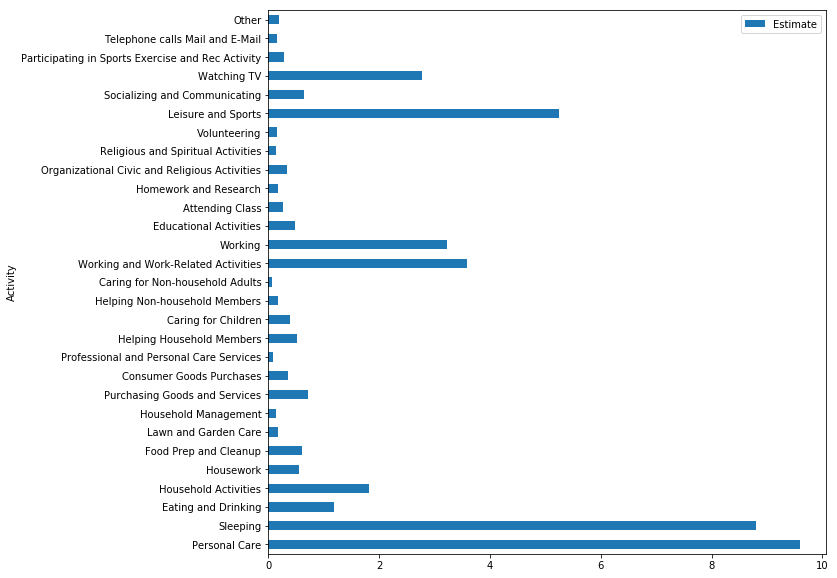

In [83]:
by_year[["Estimate", "Activity"]].get_group(2017).set_index("Activity").plot(kind="barh", figsize=(10,10))
plt.show()


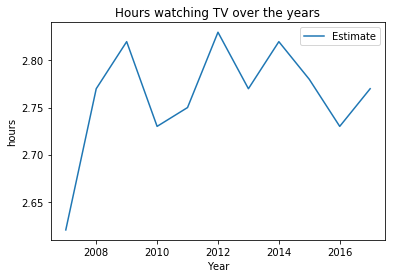

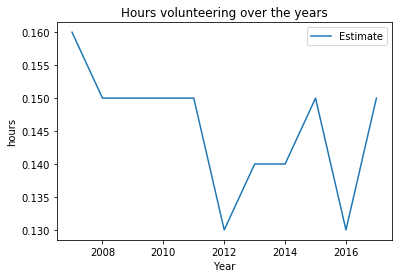

In [97]:
by_activity.get_group("Watching TV").plot(x="Year", y="Estimate")
plt.title("Hours watching TV over the years")
plt.ylabel("hours")
plt.show()
by_activity.get_group("Volunteering").plot(x="Year", y="Estimate")
plt.title("Hours volunteering over the years")
plt.ylabel("hours")
plt.show()

1. In what activity did Americans spend most of their time in 2017?
Personal Care

2. In what year did Watching TV increase the most? What about Volunteering?
For TV, 2007 to 2008.
For volunteering, 2016 to 2017

## Problem 3

The file `Ohio_1999.csv` contains data on workers in Ohio in the year 1999. Use pivot tables to answer the following questions:

1. What was the highest paid race/sex combination? What was the lowest paid?

2. What race/sex combination worked the least amount of hours? What from the data explains why?

3. What race/sex combination works the most hours per week per person?

Some useful keys for the information are:

1. In column `Sex`, {1: `male`,2: `female`}

2. In column `Race`, {1: `White`,2: `African-American`,3: `Native American/Eskimo`,4: `Asian`}

In [106]:
ohio = pd.read_csv("Ohio_1999.csv")
ohio.sample(10)

,Usual Weekly Earnings,Usual Hours Worked,Age,Educational Attainment,Race,Sex,Yearly Salary
1094,1525,50,31,43,1,1,85000
573,0,40,37,40,2,2,18000
907,0,40,45,40,2,2,31000
1072,0,40,42,39,1,2,12000
1135,1115,40,34,43,1,1,55000
1345,961,0,41,39,1,1,54000
1049,0,40,54,39,2,2,22000
92,0,50,49,42,1,1,41000
1569,0,40,21,39,1,1,7367
1449,0,40,36,44,1,1,81360


In [104]:
ohio.pivot_table(values="Yearly Salary", index="Sex", columns="Race")

Race,1,2,3,4
Sex,,,,
1,47564.566745,32872.067797,53000.0,54347.066667
2,30867.947917,26615.897059,29000.0,36477.777778


In [105]:
ohio.pivot_table(values="Usual Hours Worked", index="Sex", columns="Race")

Race,1,2,3,4
Sex,,,,
1,43.254098,40.372881,48.666667,38.666667
2,40.512153,38.000000,40.000000,40.555556


In [ ]:
ohio.pivot_table(values="", index="Sex", columns="Race")

1. What was the highest paid race/sex combination? What was the lowest paid?

The highest were Asian males with 54347, and the lowest were African-American females with 26615.

2. What race/sex combination worked the least amount of hours? What from the data explains why?

Least amount of hours worked were by African-American females, and it can be explained by looking at the "Usual Hours Worked" column 

3. What race/sex combination works the most hours per week per person?

Native American/Eskimo male

## Problem 4

Use the employment data from Ohio in 1999 to answer the following questions:

1. The column `Educational Attainment` contains numbers 0-46. Any number less than 39 means the person did not get any form of degree. 40-42 refers to either a high-school or associate's degree. A number greater than 43 means the person got at least a bachelor's degree. What is the most common degree among workers?

2. Partition the `Age` column into 4 equally populated intervals. Which interval contains the most workers with no degree? A degree that is less than a bachelor's degree? A bachelor's degree or higher?

3. What age/degree combination has the greatest yearly salary on average?


In [117]:
education = pd.cut(ohio["Educational Attainment"], [0,39,42,46])
ohio.pivot_table(values="Yearly Salary", index=[education], aggfunc="count")

,Yearly Salary
Educational Attainment,
"(0, 39]",693
"(39, 42]",362
"(42, 46]",530


In [120]:
age = pd.qcut(ohio["Age"], 4)
ohio.pivot_table(values="Yearly Salary", index=education, columns=age, aggfunc="count")

Age,"(15.999, 32.0]","(32.0, 40.0]","(40.0, 49.0]","(49.0, 85.0]"
Educational Attainment,,,,
"(0, 39]",193,151,181,168
"(39, 42]",107,88,90,77
"(42, 46]",130,141,139,120


In [121]:
ohio.pivot_table(values="Yearly Salary", index=education, columns=age)

Age,"(15.999, 32.0]","(32.0, 40.0]","(40.0, 49.0]","(49.0, 85.0]"
Educational Attainment,,,,
"(0, 39]",23456.025907,29030.231788,30204.055249,30050.988095
"(39, 42]",27218.355140,36018.602273,41738.266667,40149.233766
"(42, 46]",39720.338462,59218.014184,61728.827338,75260.100000


1. The column `Educational Attainment` contains numbers 0-46. Any number less than 39 means the person did not get any form of degree. 40-42 refers to either a high-school or associate's degree. A number greater than 43 means the person got at least a bachelor's degree. What is the most common degree among workers?

No degree

2. Partition the `Age` column into 4 equally populated intervals. Which interval contains the most workers with no degree? A degree that is less than a bachelor's degree? A bachelor's degree or higher?

No degree: (15.999, 32]

< bachelor's: (15.999, 32]

\>= bachelor's: (32, 40]

3. What age/degree combination has the greatest yearly salary on average?

/>= bachelor's, age between (49,85]

## Problem 5

The `pydataset` contains a data set `iris`, which contains the measurements of various flower species.
Use this data to answer the following questions:

1. Which flower species is the easiest distinguish and why?

2. What is the correlation between petal and sepal size for each species?

In [123]:
from pydataset import data
iris = data("iris")
iris.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
137,6.3,3.4,5.6,2.4,virginica
19,5.7,3.8,1.7,0.3,setosa
133,6.4,2.8,5.6,2.2,virginica
5,5.0,3.6,1.4,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
55,6.5,2.8,4.6,1.5,versicolor
45,5.1,3.8,1.9,0.4,setosa
70,5.6,2.5,3.9,1.1,versicolor
56,5.7,2.8,4.5,1.3,versicolor
13,4.8,3.0,1.4,0.1,setosa


In [126]:
species = iris.groupby("Species")
species.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


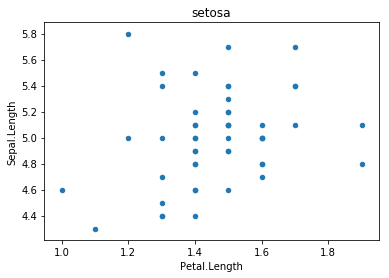

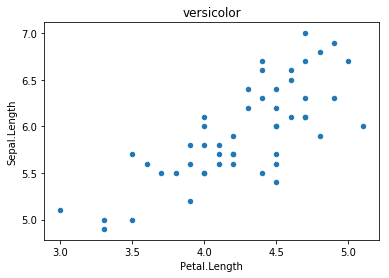

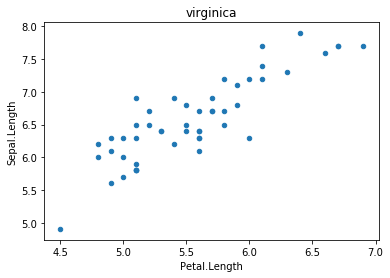

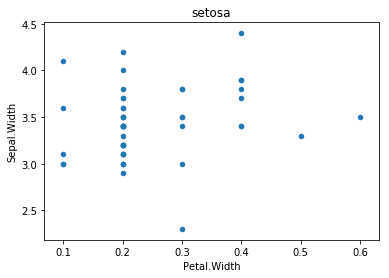

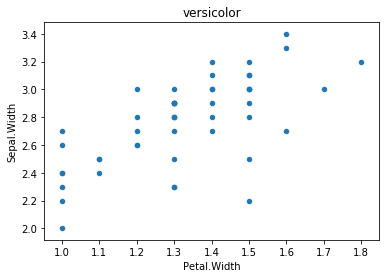

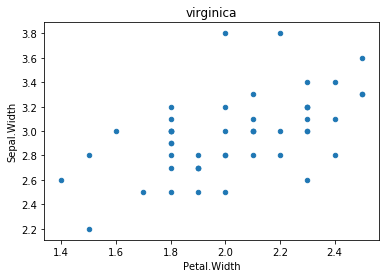

In [137]:
species.get_group(("setosa")).plot(kind="scatter", x="Petal.Length", y="Sepal.Length")
plt.title("setosa")
species.get_group(("versicolor")).plot(kind="scatter", x="Petal.Length", y="Sepal.Length")
plt.title("versicolor")
species.get_group(("virginica")).plot(kind="scatter", x="Petal.Length", y="Sepal.Length")
plt.title("virginica")
plt.show()
species.get_group(("setosa")).plot(kind="scatter", x="Petal.Width", y="Sepal.Width")
plt.title("setosa")
species.get_group(("versicolor")).plot(kind="scatter", x="Petal.Width", y="Sepal.Width")
plt.title("versicolor")
species.get_group(("virginica")).plot(kind="scatter", x="Petal.Width", y="Sepal.Width")
plt.title("virginica")
plt.show()

1. Which flower species is the easiest distinguish and why?

Setosa, because it has significantly smaller peta length and width compared to the other species.

2. What is the correlation between petal and sepal size for each species?

Close to no correlation between sepal length and petal length for setosa, and between sepal width and petal width for setosa

Farily strong positive correlation between sepal length and petal length for versicolor and virginica

Weak positive correlation between sepal width and petal width for veriscolor and virginica